# Hello World - Classificação

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import graphviz


SEED = 5435

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

dados = pd.read_csv(url)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Sim,Sim,24,Sim,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,Sim,ChequePapel,84.80,Nao
7039,0,Sim,Sim,72,Sim,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,Sim,CartaoDeCredito,103.20,Nao
7040,0,Sim,Sim,11,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.60,Nao
7041,1,Sim,Nao,4,Sim,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,74.40,Sim


## Transformando dataset

In [4]:
traducao_dic = {'Sim' : 1, 'Nao': 0}

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


In [5]:
dadosmodificados

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [6]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,False,False,...,False,False,True,False,False,True,False,False,True,False
7039,1,1,1,1,0,0,72,103.20,False,False,...,False,False,True,False,False,True,True,False,False,False
7040,1,1,0,1,0,0,11,29.60,False,True,...,True,False,False,False,True,False,False,True,False,False
7041,1,0,1,1,1,1,4,74.40,False,False,...,True,False,False,False,True,False,False,False,True,False


In [7]:
pd.set_option('display.max_columns', 39)

In [8]:
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False
7039,1,1,1,1,0,0,72,103.20,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False
7040,1,1,0,1,0,0,11,29.60,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
7041,1,0,1,1,1,1,4,74.40,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False


## Balanceando dados

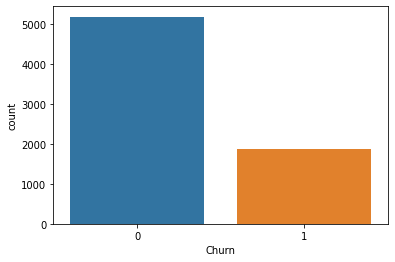

In [9]:
ax = sns.countplot(x='Churn', data=dados_final)

In [10]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [11]:
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [12]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


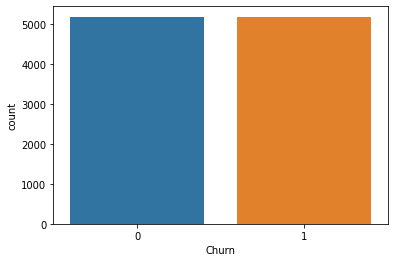

In [13]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [14]:
dados_final.shape

(10348, 39)

## Modelo K-Nearest Neighbors (KNN)


In [15]:
# Treino e teste
X = dados_final.drop('Churn', axis = 1)
Y = dados_final['Churn']

In [16]:
X

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,1,29.850000,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,34,56.950000,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,0,2,53.850000,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,45,42.300000,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,0,2,70.700000,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,1,1,0,5,80.921075,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
10344,0,0,1,1,0,3,74.347278,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False
10345,0,0,1,1,0,18,70.164647,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
10346,0,0,1,0,0,30,93.024726,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,True,False,True,False,False,False


In [17]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(X)
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.99594945,  3.06083934, -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77851405, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35092813,  0.91935908,
       -0.44850949, -0.73960631,  0.7857356 , -0.44850949, -0.60652979,
        1.08898545, -0.44850949, -0.84621879,  1.10588699, -0.44850949,
       -0.85804523, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05382378, -0.54742438, -0.5311508 ])

In [18]:
Xmaria = X.iloc[[50]]

In [19]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673,  2.41835579,
         0.64218992,  0.77815769, -0.99594945, -0.32670777,  1.0690588 ,
        -0.67423777,  0.94470379, -0.44850949,  0.77851405, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35092813,  0.91935908,
        -0.44850949, -0.73960631,  0.7857356 , -0.44850949, -0.60652979,
        -0.91828591, -0.44850949,  1.18172749,  1.10588699, -0.44850949,
        -0.85804523, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
         1.05382378, -0.54742438, -0.5311508 ]])

### Distância Euclidiana

In [20]:
a = Xmaria_normalizado
b = x_normalizado[0]

In [21]:
#1 - Subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  2.83185988,
         1.74990291,  2.09991772,  0.        , -3.38754711,  2.00446104,
        -2.15739408,  2.00323664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -2.00727136,  0.        ,  2.02794627,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [22]:
#2 - Exponenciação
np.square(a-b)

array([[ 4.22579699,  0.        , 11.47547544,  0.        ,  8.01943037,
         3.0621602 ,  4.40965444,  0.        , 11.47547544,  4.01786408,
         4.6543492 ,  4.01295706,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         4.02913833,  0.        ,  4.11256609,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [23]:
#3 - Soma
np.sum(np.square(a-b))

63.494867629866675

In [24]:
#4 - então tiramos a raiz quadrada e temos a nossa distância
np.sqrt(64.6865726280366)

8.042796318945085

Outros tipos de distância:

* distância euclidiana;
* distância de Manhattan;
* distância de Minkowski;
* distância de Chebyshev.

### Documentação

#### Nearest Neighbor: Classificação

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms:~:text=1.6.7.1.%20Classification%C2%B6

#### KNeighbor Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### Métricas de distância
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric


## Implementando o modelo

In [25]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_normalizado,y,test_size=0.3,random_state=SEED)

## Treino e teste

In [26]:
knn = KNeighborsClassifier(metric='euclidean')

In [27]:
knn.fit(X_treino,y_treino)

KNeighborsClassifier(metric='euclidean')

In [28]:
predito_knn = knn.predict(X_teste)

In [29]:
predito_knn

array([0, 1, 0, ..., 1, 1, 1])

In [30]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [31]:
calcula_distancia(x_normalizado, Xmaria_normalizado, 10)

[7.968366685203855,
 9.255389283617841,
 7.512521151661502,
 10.743908721514742,
 5.997220532751919,
 5.932863376613826,
 4.980083314846495,
 9.474276605260217,
 6.867396149511238,
 8.686992741305446]

## Teorema de Naive Bayes 

$$ P(y|X) = \frac{P(X|y) * P(y)}{P(X)} $$

$ P(y|X) $ = Probabilidade de y, dado que X acontenceu. Conhecido como "probabilidade a posteriori".

$ P(X|y) $ = Probabilidade de X, dado que y acontenceu. Conhecido como "Verossimilhança".

$ P(y) $ = Probabilidade a priori da classe. Qual a probabilidade de uma determinada classe ocorrer em toda a amostra. "Se o y vai ser 1 ou 0".

$ P(X) $ = Probabilidade a priori da evidência. Probabilidede de X.

In [32]:
P_x = 0.015
P_y = 0.14
P_Xy = 0.006

p_yX = (P_Xy * P_y) / P_x

print(p_yX)

print(f'Probabilidade de {p_yX:.3f}%')

0.056000000000000015
Probabilidade de 0.056%


### Multivariada de Bernoulli

Os dados estão apenas em variáveis binárias (1 ou 0).

$$ P(x{i}|y) = P(i|y)x{i} + (1-P(i|y))(1-x{i}) $$

*i* = número de características no conjunto de variáveis.

y = classe (1 ou 0)

$ P(i|y) $ = Parâmetro *p* da Distribuição de Bernoulli". Probabilidade de *i* dado *y* aconteceu. 

$ x{i} $ = Características (variáveis dos conjuntos de dados)

### Treinamento e Teste

In [33]:
X_treino

array([[ 1.26542767, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438,  1.88270449],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438,  1.88270449],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ]])

In [34]:
y_treino

10238    1
5226     0
8447     1
5451     0
5921     0
        ..
10026    1
2682     1
2280     0
703      0
9315     1
Name: Churn, Length: 7243, dtype: int64

In [35]:
mediana_X_treino = np.median(X_treino)
mediana_X_treino

-0.44850949388572553

In [36]:
bnb = BernoulliNB(binarize=0.44850949388572553)

In [37]:
bnb.fit(X_treino,y_treino)

BernoulliNB(binarize=0.44850949388572553)

In [38]:
predito_bnb = bnb.predict(X_teste)

## Árvore de Decisão

Decisões a partir de cada variável a partir de "nós de decisão".

Vantagens:
* Ela é fácil de se entender/visualizar 
* Não necessita fazer tratamentos, limpeza, normalização porque ela não é tão sensível a outliers.
* Trabalha com variáveis categórias e numéricas


Desvantagens:
* Possibilidade de overfitting caso cresça muito.

### Como funciona uma árvore de decisão??

#### Critérios de decisão dos nós

* Índice Gini
* Ganho de informação (entropia)
* Qui-quadrado
* Redução da variância



#### Índice Gini

Medir o quanto heterogêneo é o dado (quão "impuro" ele é consigo mesmo). 
Quanto mais próximo de 1, mais heterogêneo.
Quanto menos próximo de 1, mais homogêneo.


$$ G = {∑^c}_{k=1}Pk(1-Pk) $$

Pk = probabilidade de ocorrência de um dado dado da classe K

(1-Pk) = Probabilidade de não ocorrência de um dado da classe K


#### Ganho de informação (entropia)

Mede a ordem dos dados.
Quanto maior a entropia, mais desornado.
Quanto menor a entropia, menos desordenado.


$$ Entropia = -{∑^c}_{i=1}Pk * log(Pk) $$

Pk = probabilidade de ocorrência de um dado dado da classe K


### Implementando o modelo

In [39]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED)

In [40]:
dtc.fit(X_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=5435)

In [41]:
dtc.feature_importances_

array([0.01942516, 0.018309  , 0.00262329, 0.01971371, 0.01602323,
       0.14414726, 0.22242513, 0.01133985, 0.00158546, 0.00891955,
       0.00208773, 0.00724771, 0.        , 0.023509  , 0.        ,
       0.0166835 , 0.00886285, 0.        , 0.00803563, 0.00958746,
       0.        , 0.00994346, 0.02296857, 0.        , 0.01491872,
       0.00596528, 0.        , 0.00656552, 0.00956836, 0.        ,
       0.02202881, 0.00862426, 0.22488394, 0.02140049, 0.01924914,
       0.05602257, 0.01697844, 0.02035695])

In [42]:
predito_arvore_decisao = dtc.predict(X_teste)

## Dummy

In [43]:
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_treino,y_treino)
predito_dummy = dummy.predict(X_teste)

## Verificação das métricas dos modelos

#### Matriz de confusão

In [44]:
print(confusion_matrix(y_teste,predito_bnb))

[[1017  512]
 [ 205 1371]]


In [45]:
print(confusion_matrix(y_teste,predito_knn))

[[1224  305]
 [ 271 1305]]


In [46]:
print(confusion_matrix(y_teste,predito_arvore_decisao))

[[1211  318]
 [ 267 1309]]


In [47]:
print(confusion_matrix(y_teste,predito_dummy))

[[731 798]
 [803 773]]


### Acurácia

Desempenho geral do modelo.

$$ ACC = \frac{TP + TN}{TP+FP+TN+FN} $$

In [48]:
print(accuracy_score(y_teste,predito_bnb))

0.7690821256038647


In [49]:
print(accuracy_score(y_teste,predito_knn))

0.8144927536231884


In [50]:
print(accuracy_score(y_teste,predito_arvore_decisao))

0.8115942028985508


In [51]:
print(accuracy_score(y_teste,predito_dummy))

0.48438003220611914


### Precisão

Quantos verdadeiros positivos foram classificados corretamente.

Usada quando os falsos positivos são considerados mais prejudiciais que os falsos negativos.

$$ PS = \frac{TP}{TP + FP} $$

In [52]:
print(precision_score(y_teste,predito_bnb))

0.7280934678704195


In [53]:
print(precision_score(y_teste,predito_knn))

0.8105590062111802


In [54]:
print(precision_score(y_teste,predito_arvore_decisao))

0.8045482483097726


In [55]:
print(precision_score(y_teste,predito_dummy))

0.49204328453214513


### Recall

Também conhecida como Revocação ou Sensibilidade. 

Ele calcula o quão bom o modelo está para classificar corretamente um resultado positivo.

Usado quando os falsos negativos são considerados mais prejudiciais que os Falsos Positivos.


$$ RC = \frac{TP}{TP + FN} $$ 


In [56]:
print(recall_score(y_teste,predito_bnb))

0.8699238578680203


In [57]:
print(recall_score(y_teste,predito_knn))

0.8280456852791879


In [58]:
print(recall_score(y_teste,predito_arvore_decisao))

0.8305837563451777


In [59]:
print(recall_score(y_teste,predito_dummy))

0.49048223350253806


### F1 Score

É uma métrica para identificar se algum dos valores de revocação ou precisão estão baixos.

Ela é uma média harmônica entre a revocação e a precisão.


$$ f1 = 2* \frac{precisão * revocacão}{precisão + revocacão} $$

In [60]:
print(f1_score(y_teste,predito_bnb))

0.792714657415438


In [61]:
print(f1_score(y_teste,predito_knn))

0.8192090395480226


In [62]:
print(f1_score(y_teste,predito_arvore_decisao))

0.8173587261941929


In [63]:
print(f1_score(y_teste,predito_dummy))

0.4912615189068954


### Curva ROC e AUC

AUC (Area Under the Curve).
Receiver Operating Characteristic Curve (ROC curve).

Essa métrica tem valor máximo de 1 e quanto maior o número mais bem avaliado será o modelo de classificação.

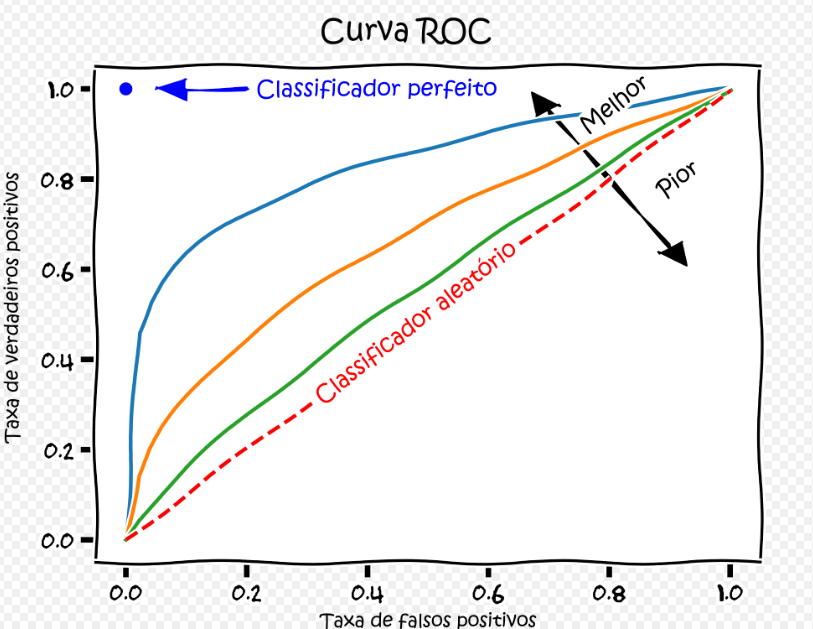

In [64]:
y_pred_bnb = bnb.predict_proba(X_teste)[:,1]
fpr_bnb, tpr_bnb, _ = roc_curve(y_teste, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)
roc_auc_bnb

0.8477144910744224

In [65]:
y_pred_knn = knn.predict_proba(X_teste)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_knn

0.8888404965921125

In [66]:
y_pred_dtc = dtc.predict_proba(X_teste)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_teste, y_pred_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
roc_auc_dtc

0.8135837430655384

In [67]:
y_pred_dummy = dummy.predict_proba(X_teste)[:,1]
fpr_dummy, tpr_dummy, _ = roc_curve(y_teste, y_pred_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)
roc_auc_dummy

0.5

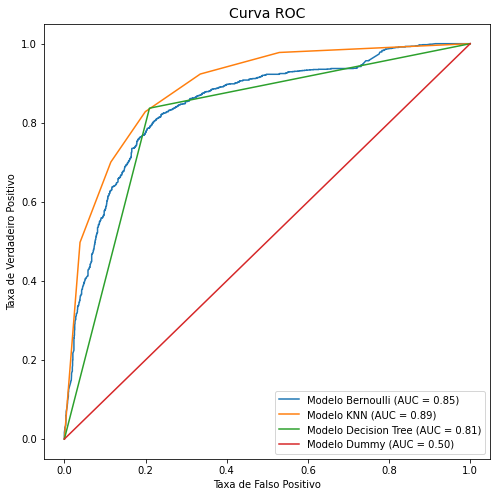

In [68]:
plt.figure(figsize=(8,8))
plt.plot(fpr_bnb, tpr_bnb, label='Modelo Bernoulli (AUC = %0.2f)' % roc_auc_bnb)
plt.plot(fpr_knn, tpr_knn, label='Modelo KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, label='Modelo Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_dummy, tpr_dummy, label='Modelo Dummy (AUC = %0.2f)' % roc_auc_dummy)

plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC',size=14)
plt.legend(loc="lower right")

plt.show()


# Escolhendo o modelo

In [69]:
precisao_BNB = precision_score(y_teste,predito_bnb).round(4)
precisao_KNN = precision_score(y_teste,predito_knn).round(4)
precisao_dtc = precision_score(y_teste,predito_arvore_decisao).round(4)
precisao_dummy = precision_score(y_teste,predito_dummy).round(4)

print(f'Modelo Bernoulli de Naive Bayes: {precisao_BNB} ')
print(f'Modelo KNN: {precisao_KNN} ')
print(f'Modelo Árvore de Decisão: {precisao_dtc} ')
print(f'Modelo Dummy: {precisao_dummy} ')

Modelo Bernoulli de Naive Bayes: 0.7281 
Modelo KNN: 0.8106 
Modelo Árvore de Decisão: 0.8045 
Modelo Dummy: 0.492 


In [70]:
def metricas_classificao(nome_modelo,predicao,auc):

  metricas = classification_report(y_teste, predicao,output_dict=True)
  metricas = pd.DataFrame(metricas)
  df_metricas = pd.DataFrame({'AUC': auc,
                              'Acurácia' :  [metricas.iloc[0,2]],
                              'F1-score_1': [metricas.iloc[2,1]],
                              'Precisão':   [metricas.iloc[0,1]],
                              'Revocação':     [metricas.iloc[1,1]]},
                              index=[nome_modelo])
  
  return df_metricas

In [71]:
metricas_BNB = metricas_classificao('Modelo Bernoulli de Naive Bayes',predito_bnb,roc_auc_bnb).round(3)
metricas_knn = metricas_classificao('Modelo KNN',predito_knn,roc_auc_knn).round(3)
metricas_dtc = metricas_classificao('Modelo Árvore de Decisão',predito_arvore_decisao,roc_auc_dtc).round(3)
metricas_dummy = metricas_classificao('Modelo Dummy',predito_dummy,roc_auc_dummy).round(3)
metricas_modelos = pd.concat([metricas_BNB,metricas_knn,metricas_dtc,metricas_dummy])

In [72]:
metricas_modelos.sort_values(by='Acurácia',ascending=False)

,AUC,Acurácia,F1-score_1,Precisão,Revocação
Modelo KNN,0.889,0.814,0.819,0.811,0.828
Modelo Árvore de Decisão,0.814,0.812,0.817,0.805,0.831
Modelo Bernoulli de Naive Bayes,0.848,0.769,0.793,0.728,0.870
Modelo Dummy,0.500,0.484,0.491,0.492,0.490


In [73]:
def imprime_resultados(results):
    metricas = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

    for metrica in metricas:
        media_resultados = results[f'test_{metrica}'].mean().round(2)
        desvio_padrao_resultados = results[f'test_{metrica}'].std()
        min_resultados = round((media_resultados - (2 * desvio_padrao_resultados)) * 100, 2)
        max_resultados = round((media_resultados + (2 * desvio_padrao_resultados)) * 100, 2)
        variacao_do_intervalo = round(max_resultados - min_resultados, 2)

        print(f'--> {metrica}')
        print(f'\tMédia: {media_resultados * 100}')
        print(f'\tMin: {min_resultados}\n\tMax: {max_resultados}')
        print(f'\tVariação do intervalo = {variacao_do_intervalo}')

In [74]:
dados_final = dados_final.sample(frac=1).reset_index(drop=1)

X = dados_final.drop('Churn', axis=1)
Y = dados_final['Churn']

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=SEED)

scoring = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

print(10*'+-', 'DUMMY CLASSIFIER', 10*'-+')
dummy = DummyClassifier(strategy="uniform")
results = cross_validate(dummy, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'DECISION TREE CLASSIFIER', 10*'-+')
dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
results = cross_validate(dtc, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'K NEIGHBORS CLASSIFIER', 10*'-+')
knn = KNeighborsClassifier(metric='euclidean')
results = cross_validate(knn, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'BERNOULLI NB CLASSIFIER', 10*'-+')
bnb = BernoulliNB(binarize=0.44850949388572553)
results = cross_validate(bnb, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

+-+-+-+-+-+-+-+-+-+- DUMMY CLASSIFIER -+-+-+-+-+-+-+-+-+-+
--> roc_auc
	Média: 50.0
	Min: 50.0
	Max: 50.0
	Variação do intervalo = 0.0
--> accuracy
	Média: 50.0
	Min: 47.78
	Max: 52.22
	Variação do intervalo = 4.44
--> f1
	Média: 50.0
	Min: 47.49
	Max: 52.51
	Variação do intervalo = 5.02
--> precision
	Média: 50.0
	Min: 46.98
	Max: 53.02
	Variação do intervalo = 6.04
--> recall
	Média: 50.0
	Min: 47.27
	Max: 52.73
	Variação do intervalo = 5.46
------------------------------------------------------------

 +-+-+-+-+-+-+-+-+-+- DECISION TREE CLASSIFIER -+-+-+-+-+-+-+-+-+-+
--> roc_auc
	Média: 81.0
	Min: 79.25
	Max: 82.75
	Variação do intervalo = 3.5
--> accuracy
	Média: 81.0
	Min: 79.25
	Max: 82.75
	Variação do intervalo = 3.5
--> f1
	Média: 81.0
	Min: 79.23
	Max: 82.77
	Variação do intervalo = 3.54
--> precision
	Média: 81.0
	Min: 78.86
	Max: 83.14
	Variação do intervalo = 4.28
--> recall
	Média: 82.0
	Min: 79.8
	Max: 84.2
	Variação do intervalo = 4.4
-----------------------------------

--> roc_auc
	Média: 89.0
	Min: 87.77
	Max: 90.23
	Variação do intervalo = 2.46
--> accuracy
	Média: 82.0
	Min: 80.46
	Max: 83.54
	Variação do intervalo = 3.08
--> f1
	Média: 83.0
	Min: 81.48
	Max: 84.52
	Variação do intervalo = 3.04
--> precision
	Média: 77.0
	Min: 74.89
	Max: 79.11
	Variação do intervalo = 4.22
--> recall
	Média: 91.0
	Min: 88.96
	Max: 93.04
	Variação do intervalo = 4.08
------------------------------------------------------------

 +-+-+-+-+-+-+-+-+-+- BERNOULLI NB CLASSIFIER -+-+-+-+-+-+-+-+-+-+
--> roc_auc
	Média: 85.0
	Min: 83.37
	Max: 86.63
	Variação do intervalo = 3.26
--> accuracy
	Média: 77.0
	Min: 75.46
	Max: 78.54
	Variação do intervalo = 3.08
--> f1
	Média: 79.0
	Min: 77.61
	Max: 80.39
	Variação do intervalo = 2.78
--> precision
	Média: 72.0
	Min: 70.07
	Max: 73.93
	Variação do intervalo = 3.86
--> recall
	Média: 87.0
	Min: 85.12
	Max: 88.88
	Variação do intervalo = 3.76
------------------------------------------------------------


# Qual modelo escolher?

Escolho a métrica do F1_score, pois ela utilizará apenas em um número o melhor modelo que tenha maior precisão e revocação.

A precisão é importante, pois entenderei corretamente quais são os clientes que estão, de fato, saindo da Alura Voz.
A revocação é importante, pois entenderei conseguirei abarcar todos os demais clientes, que mesmo que não estão saindo eu diga que eles estão saindo e dessa forma ter uma estratégia abrangendo maior número.

Escolherei a Árvore de Decisão e o KNN para otimizar os hiperparâmetros.



## Otimização dos hiperparâmetros

In [ ]:
--> OTIMIZAR
--> VALIDAÇÃO CRUZADA
--> ESCOLHA DE MODELO 
--> SALVAR MODELO

In [108]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "criterion": ["gini", "entropy","log_loss"],
    "splitter": ["best", "random"],
    "max_depth" : list(range(16)),
    "min_samples_split": list(range(101)),
    "min_samples_leaf": list(range(101)),
    "max_features" : ["auto", "sqrt", "log2",None],
    "max_leaf_nodes": list(range(16))
    }

busca = RandomizedSearchCV(dtc,
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X, Y)

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=5435),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14,
                                                      15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9, 10, 11, 12,
                                                           13, 14, 15],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, ...],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29, ...],
                                        'splitter': ['best', 'random']})

In [ ]:
print('\n', 10*'+-', 'DECISION TREE CLASSIFIER', 10*'-+')
dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
results = cross_validate(dtc, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')
